import libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

import os
os.environ['LOKY_MAX_CPU_COUNT'] = '8'  #specify the number of physical cores to avoid some warnings due to sklearn library (joblib)


In [10]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:

#select relevent features
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X=df[features]
numberOfClusters=range(2,10)
inetriaErrors=[]
silhouetteScore=[]
for i in numberOfClusters:
    kmeans=KMeans(n_clusters=i,random_state=40,n_init=10)
    kmeans.fit(X)
    inetriaErrors.append(kmeans.inertia_)
    silhouetteScore.append(silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']],kmeans.labels_))
print("inetria :",inetriaErrors[:3])
print("silhouetteScore :",silhouetteScore[:3])

inetria : [181363.59595959593, 106348.37306211118, 73679.78903948836]
silhouetteScore : [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


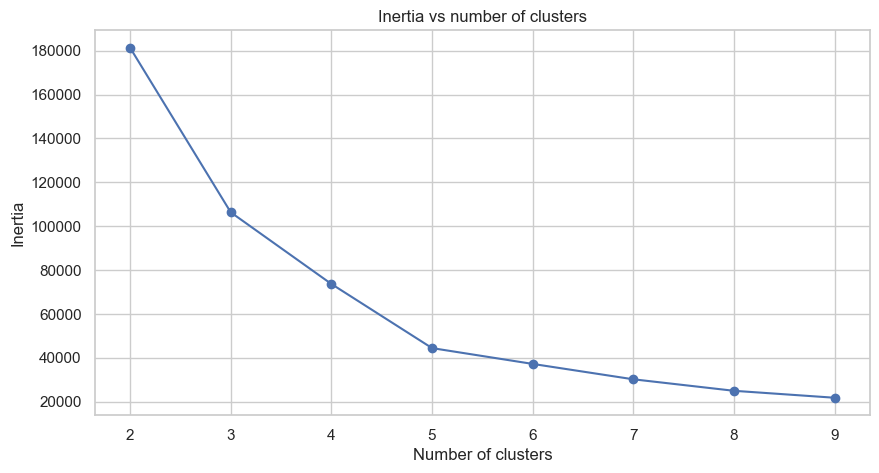

In [15]:
x_values = list(range(2,10))
plt.figure(figsize=(10,5))
import seaborn as sns
sns.set(style='whitegrid')
plt.plot(x_values, inetriaErrors, '-o', label='Inertia')
plt.title('Inertia vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

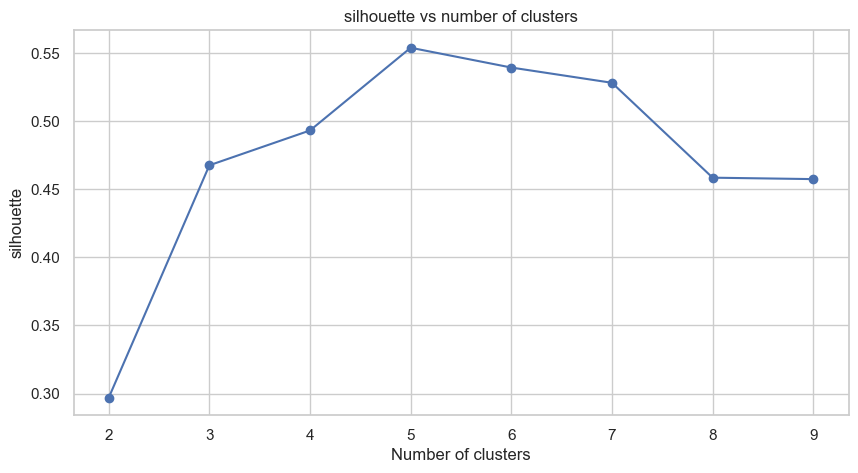

In [17]:
x_values = list(range(2,10))
plt.figure(figsize=(10,5))
import seaborn as sns
sns.set(style='whitegrid')
plt.plot(x_values, silhouetteScore, '-o', label='Inertia')
plt.title('silhouette vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.grid(True)
plt.show()

from the previous two plots it seems that the best number of clusters is 5

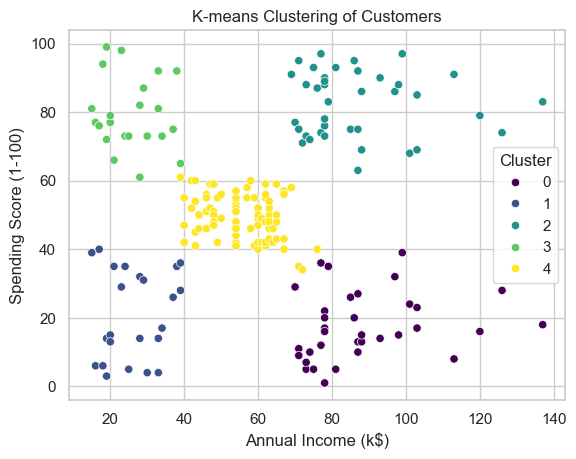

In [20]:
model = KMeans(n_clusters=5,random_state=40,n_init=10)
model.fit(X)
cluster_labels = model.labels_
df['Cluster'] = cluster_labels

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()